# Name : Samer AlTaki
### IOT & Computer Vision 
## Task5 :
## Traffic Signs Classification

#   

In [ ]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from imgaug import augmenters  as iaa
import cv2
import random

**1- Mount google drive and import dataset**



In [5]:
#mount google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [116]:
training_file = "/content/drive/MyDrive/classify/data/train.p"
validation_file= "/content/drive/MyDrive/classify/data/valid.p"
testing_file = "/content/drive/MyDrive/classify/data/test.p"

with open(training_file, mode='rb') as f:
    train = pkl.load(f)
with open(validation_file, mode='rb') as f:
    valid = pkl.load(f)
with open(testing_file, mode='rb') as f:
    test = pkl.load(f)

In [117]:
WIDTH = 32
HEIGHT = 32

In [118]:
X_train = train['features']
y_train = train['labels']

print(X_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


In [119]:
X_valid = valid['features']
y_valid = valid['labels']

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

print(X_valid.shape)
print(y_valid.shape)

(4410, 32, 32, 3)
(4410,)


**2- About the Dataset**

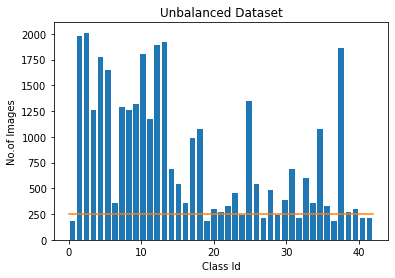

In [120]:
num_bins = 43
samples_per_bin = 250
plt.hist(y_train, bins =num_bins,rwidth=0.8)
plt.plot((np.min(y_train), np.max(y_train)), (samples_per_bin, samples_per_bin))
plt.title('Unbalanced Dataset')
plt.xlabel('Class Id')
plt.ylabel('No.of Images')
plt.show()

_, bins = np.histogram(y_train, num_bins)

In [121]:
print(bins)

[ 0.          0.97674419  1.95348837  2.93023256  3.90697674  4.88372093
  5.86046512  6.8372093   7.81395349  8.79069767  9.76744186 10.74418605
 11.72093023 12.69767442 13.6744186  14.65116279 15.62790698 16.60465116
 17.58139535 18.55813953 19.53488372 20.51162791 21.48837209 22.46511628
 23.44186047 24.41860465 25.39534884 26.37209302 27.34883721 28.3255814
 29.30232558 30.27906977 31.25581395 32.23255814 33.20930233 34.18604651
 35.1627907  36.13953488 37.11627907 38.09302326 39.06976744 40.04651163
 41.02325581 42.        ]


In [122]:
#Balance the data
print ('total data:', len(X_train))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(y_train)):
    if y_train[i]>= bins[j] and y_train[i]<=bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  #print(list_)
  if len(list_)>samples_per_bin:
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print('removed:', len(remove_list))

X_train = np.delete(X_train, remove_list, axis=0)
print ('remaining images:', len (X_train))

y_train = np.delete(y_train, remove_list, axis=0)
print ('remaining labels:', len (y_train))

total data: 34799
removed: 24439
remaining images: 10360
remaining labels: 10360


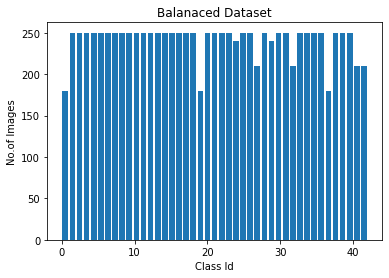

In [123]:
num_bins = 43
samples_per_bin = 500
plt.hist(y_train, bins =num_bins,rwidth=0.8)
plt.title('Balanaced Dataset')
plt.xlabel('Class Id')
plt.ylabel('No.of Images')
plt.show()

**3- Image Augmentation to Artifically Expand the Dataset**

In [124]:
#image augmentation
def zoom(image):
  zoom_img = iaa.Affine(scale = (0.9, 1.3))
  image = zoom_img.augment_image(image)
  return image

2


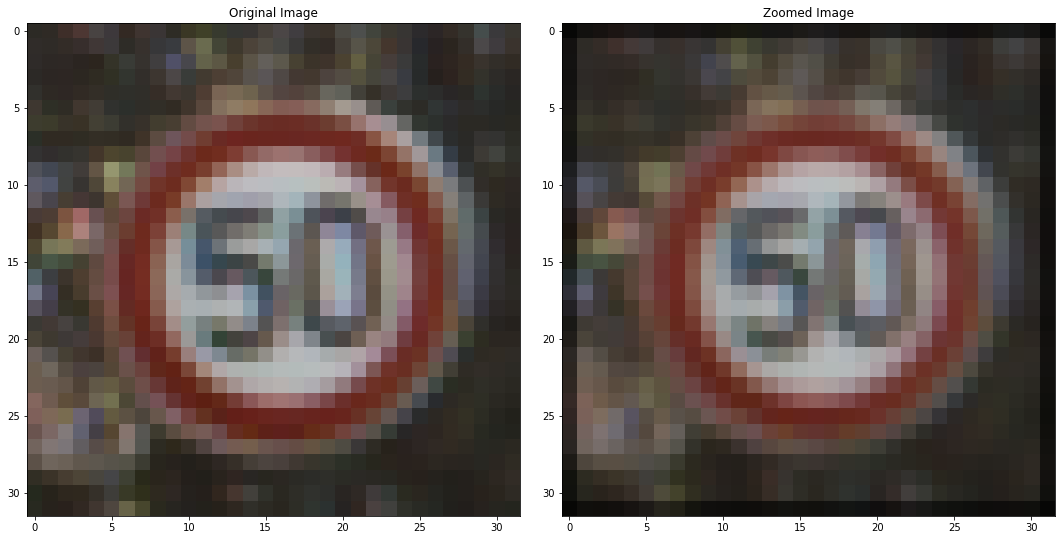

In [125]:
index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
zoomed_image = zoom(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

print(label)

In [126]:
def pan(image):
  pan = iaa.Affine(translate_percent={'x': (-0.1, 0.1), 'y': (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

(32, 32, 3)
28


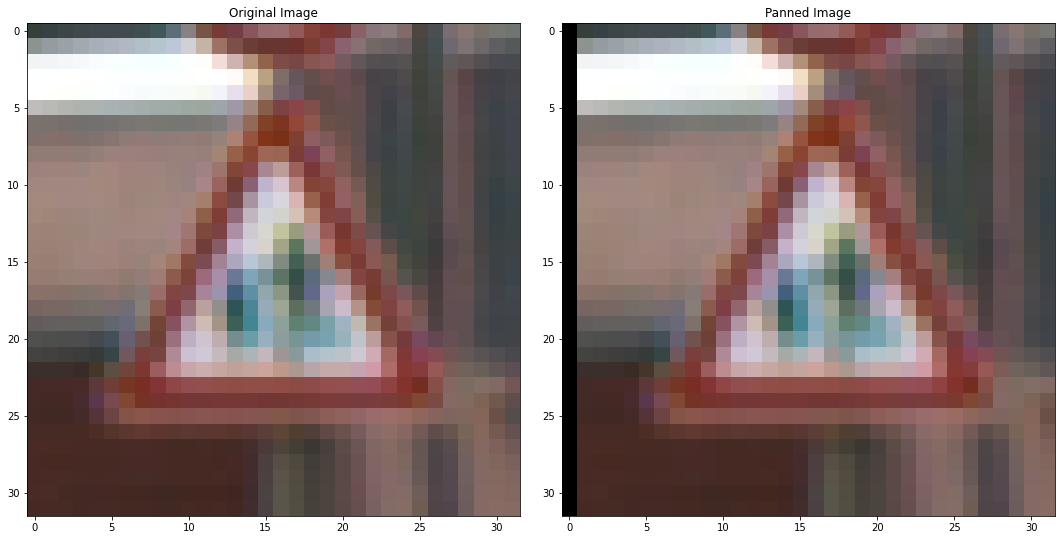

In [127]:
index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
panned_image = pan(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')
print(panned_image.shape)
print(label)

In [128]:
def img_random_brightness(image):
  brightness = iaa.Multiply((0.2, 1.8))
  image = brightness.augment_image(image)
  return image

6


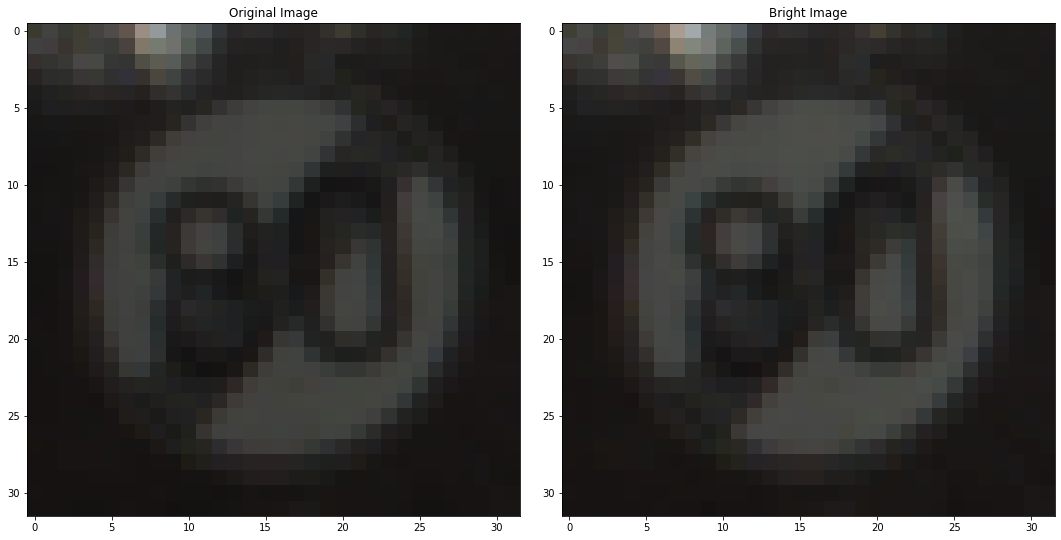

In [129]:
index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
bright_image = img_random_brightness(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(bright_image)
axs[1].set_title('Bright Image')

print(label)

In [130]:
def fillter(img):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    gradient = cv2.morphologyEx(img, 4, kernel)
    return gradient

(32, 32, 3)
20


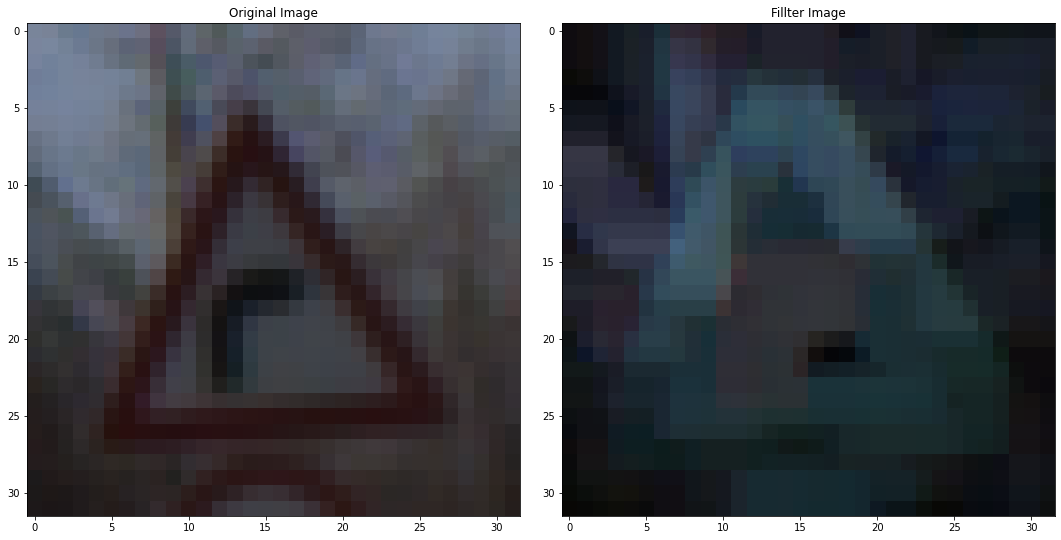

In [131]:
index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
bright_image = fillter(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(bright_image)
axs[1].set_title('Fillter Image')
print(bright_image.shape)
print(label)

In [132]:
kernel = np.array([[0, -1, 0],[-1, 5,-1],[0, -1, 0]])
def sharp(img):
    image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
    return image_sharp

(32, 32, 3)


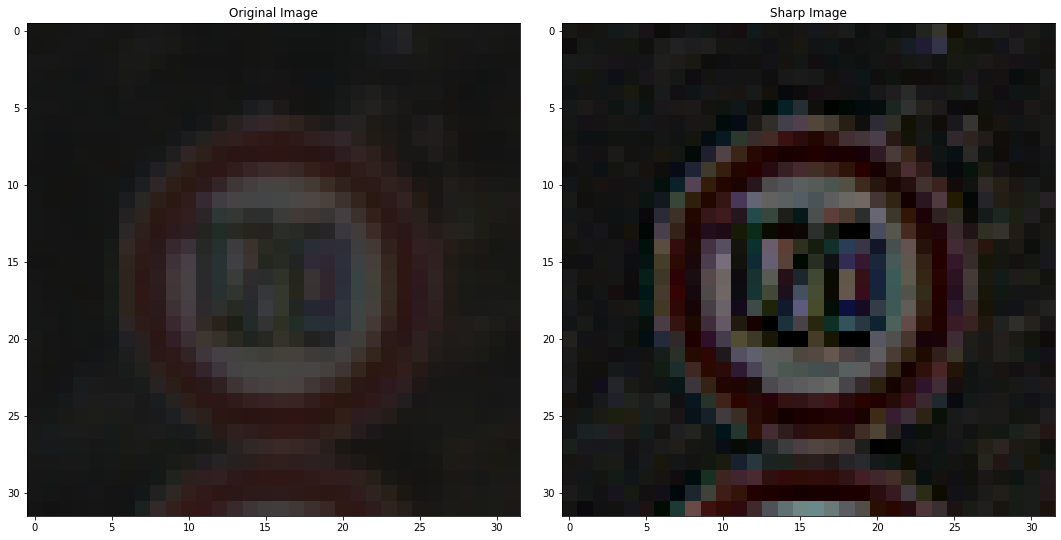

In [133]:
index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
bright_image = sharp(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(bright_image)
axs[1].set_title('Sharp Image')
print(bright_image.shape)

In [134]:
augmented_zoom_image = []
augmented_zoom_label = []

for i in range(len(y_train)):
  img = X_train[i]
  label = y_train[i]
  zoomed_img = zoom(img)
  augmented_zoom_image.append(zoomed_img)
  augmented_zoom_label.append(label)

In [135]:
augmented_pan_image = []
augmented_pan_label = []

for i in range(len(y_train)):
  img = X_train[i]
  label = y_train[i]
  panned_img = pan(img)
  augmented_pan_image.append(panned_img)
  augmented_pan_label.append(label)

In [136]:
augmented_bright_image = []
augmented_bright_label = []

for i in range(len(y_train)):
  img = X_train[i]
  label = y_train[i]
  bright_img = img_random_brightness(img)
  augmented_bright_image.append(bright_img)
  augmented_bright_label.append(label)

In [137]:
augmented_sharp_image = []
augmented_sharp_label = []

for i in range(len(y_train)):
  img = X_train[i]
  label = y_train[i]
  sharp_img = sharp(img)
  augmented_sharp_image.append(sharp_img)
  augmented_sharp_label.append(label)

In [138]:
print('Balanced Dataset Before Augmentation(Image):', X_train.shape)
print('Balanced Dataset Before Augmentation(Label):', y_train.shape)
#change to np array
augmented_zoom_image = np.array(augmented_zoom_image)
augmented_pan_image = np.array(augmented_pan_image)
augmented_bright_image = np.array(augmented_bright_image)
augmented_fillter_image = np.array(augmented_fillter_image)
augmented_sharp_image = np.array(augmented_sharp_image)
X_train = np.array(X_train)
#concatenate
X_train = np.concatenate((X_train, augmented_zoom_image, augmented_pan_image, augmented_bright_image,augmented_sharp_image))


#change to np array
augmented_zoom_label = np.array(augmented_zoom_label) #250
augmented_pan_label = np.array(augmented_pan_label) #250
augmented_bright_label = np.array(augmented_bright_label) #250
augmented_fillter_label = np.array(augmented_fillter_label)
augmented_sharp_label = np.array(augmented_sharp_label)
y_train = np.array(y_train) #250
#concatenate
y_train = np.concatenate((y_train, augmented_zoom_label, augmented_pan_label, augmented_bright_label,augmented_sharp_label))

print('Balanced Dataset After Augmentation(Image):', X_train.shape)
print('Balanced Dataset After Augmentation(Label):', y_train.shape)

Balanced Dataset Before Augmentation(Image): (10360, 32, 32, 3)
Balanced Dataset Before Augmentation(Label): (10360,)
Balanced Dataset After Augmentation(Image): (51800, 32, 32, 3)
Balanced Dataset After Augmentation(Label): (51800,)


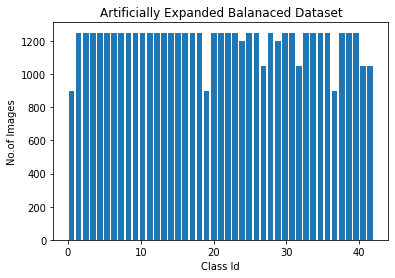

In [139]:
num_bins = 43
plt.hist(y_train, bins =num_bins,rwidth=0.8)
plt.title('Artificially Expanded Balanaced Dataset')
plt.xlabel('Class Id')
plt.ylabel('No.of Images')
plt.show()

**3- Building a CNN on Tensorflow(Keras)**

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input, Conv2D , Dropout, MaxPool2D, Flatten, Dense,  Activation, BatchNormalization 
from keras.models import Model

In [141]:
print(X_train[1].shape)

INPUT_SIZE = 32

(32, 32, 3)


In [142]:
def CNN_model():
  
  model = Sequential()

  #1st layer
  model.add(Conv2D(24, kernel_size=(5,5), strides=(1,1), input_shape=(32, 32,3), activation='relu'))
  model.add(BatchNormalization())
  #2nd layer
  model.add(Conv2D(36, kernel_size=(5,5), strides=(1,1), activation='relu'))
  model.add(BatchNormalization())
  #3rd layer
  model.add(Conv2D(48, kernel_size=(5,5), strides=(1,1), activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  #4th layer
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  model.add(BatchNormalization())
  #5th layer
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  
  model.add(Flatten())
  
  #1st Dense Layer  
  model.add(Dense(250, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  #2nd Dense Layer
  model.add(Dense(125, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  #3rd Dense Layer
  model.add(Dense(75, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  #output
  model.add(Dense(43, activation='softmax'))
  
  #Compile model

  model.compile(Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [143]:

model = CNN_model()


In [144]:
def labels_to_one_hot(y_labels, num_classes):
  matrix_eye = np.eye(num_classes)
  y_labels_array = []
  for i in range(len(y_labels)):
    y_labels_array.append(matrix_eye[:,y_labels[i]])
  return np.array(y_labels_array)

In [145]:
#change to hot encoded array!!
y_train = labels_to_one_hot(y_train, 43)
y_valid = labels_to_one_hot(y_valid, 43)



In [146]:
print(y_train.shape)
print(y_valid.shape)

(51800, 43)
(4410, 43)


**4- Training the CNN**

In [147]:
history = model.fit(x=X_train, y=y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_valid, y_valid),shuffle=True)

Epoch 1/100
1619/1619 [==============================] - 17s 10ms/step - loss: 3.3937 - accuracy: 0.1813 - val_loss: 1.4926 - val_accuracy: 0.6639
Epoch 2/100
1619/1619 [==============================] - 15s 9ms/step - loss: 1.9250 - accuracy: 0.4949 - val_loss: 0.6730 - val_accuracy: 0.8776
Epoch 3/100
1619/1619 [==============================] - 15s 9ms/step - loss: 1.2516 - accuracy: 0.6752 - val_loss: 0.2906 - val_accuracy: 0.9549
Epoch 4/100
1619/1619 [==============================] - 15s 9ms/step - loss: 0.8339 - accuracy: 0.7886 - val_loss: 0.1585 - val_accuracy: 0.9735
Epoch 5/100
1619/1619 [==============================] - 15s 9ms/step - loss: 0.5753 - accuracy: 0.8593 - val_loss: 0.0746 - val_accuracy: 0.9853
Epoch 6/100
1619/1619 [==============================] - 15s 9ms/step - loss: 0.4170 - accuracy: 0.8979 - val_loss: 0.0664 - val_accuracy: 0.9848
Epoch 7/100
1619/1619 [==============================] - 15s 9ms/step - loss: 0.3156 - accuracy: 0.9232 - val_loss: 0.0507 

Text(0.5, 0, 'epoch')

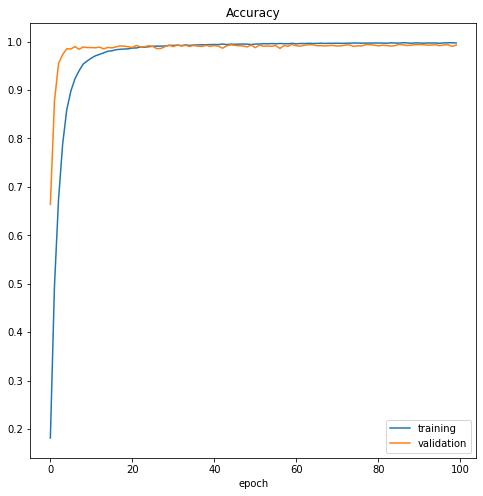

In [148]:
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

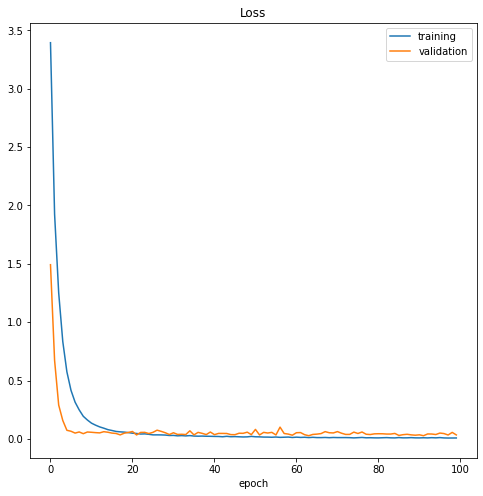

In [149]:
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

In [150]:
X_test = test['features']
y_test = test['labels']

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_test.shape)
print(y_test.shape)

y_test = labels_to_one_hot(y_test, 43)

(12630, 32, 32, 3)
(12630,)


Actual:  17
Prediction:  17


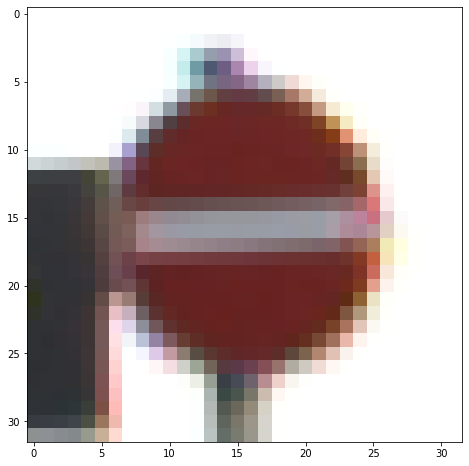

In [160]:
index = random.randint(0,len(X_test)-1)
img_testing = X_test[index]
label_testing = y_test[index]

plt.imshow(img_testing)
print ("Actual: ", np.argmax(label_testing))
img_testing = img_testing.reshape(-1, 32,32,3)

print ("Prediction: ", np.argmax(model.predict(img_testing)))

**5- Evaluate and Save the Trained Model**

In [161]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

Evaluate on test data
395/395 [==============================] - 2s 5ms/step - loss: 0.0679 - accuracy: 0.9858
test loss, test acc: [0.06789077818393707, 0.9858273863792419]


In [162]:
model.save('/content/drive/MyDrive/classify/TSR.h5')

***Fine Tuneing***

In [163]:
model.compile(Adam(learning_rate=0.00001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_valid, y_valid),shuffle=True)

Epoch 1/10
1619/1619 [==============================] - 17s 9ms/step - loss: 0.0075 - accuracy: 0.9979 - val_loss: 0.0350 - val_accuracy: 0.9925
Epoch 2/10
1619/1619 [==============================] - 15s 9ms/step - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.0383 - val_accuracy: 0.9930
Epoch 3/10
1619/1619 [==============================] - 15s 9ms/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.0343 - val_accuracy: 0.9934
Epoch 4/10
1619/1619 [==============================] - 15s 10ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.0363 - val_accuracy: 0.9934
Epoch 5/10
1619/1619 [==============================] - 15s 9ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.0333 - val_accuracy: 0.9939
Epoch 6/10
1619/1619 [==============================] - 15s 9ms/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.0333 - val_accuracy: 0.9943
Epoch 7/10
1619/1619 [==============================] - 15s 9ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.0331 - val_a

In [164]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

Evaluate on test data
395/395 [==============================] - 2s 4ms/step - loss: 0.0651 - accuracy: 0.9878
test loss, test acc: [0.06510385870933533, 0.9878067970275879]


In [165]:
model.compile(Adam(learning_rate=0.000001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_valid, y_valid),shuffle=True)

Epoch 1/10
1619/1619 [==============================] - 17s 10ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0387 - val_accuracy: 0.9939
Epoch 2/10
1619/1619 [==============================] - 15s 10ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0390 - val_accuracy: 0.9941
Epoch 3/10
1619/1619 [==============================] - 15s 9ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.0393 - val_accuracy: 0.9934
Epoch 4/10
1619/1619 [==============================] - 15s 9ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 0.0394 - val_accuracy: 0.9939
Epoch 5/10
1619/1619 [==============================] - 15s 9ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0390 - val_accuracy: 0.9937
Epoch 6/10
1619/1619 [==============================] - 15s 9ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0391 - val_accuracy: 0.9939
Epoch 7/10
1619/1619 [==============================] - 15s 9ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0386 - val_

In [166]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

Evaluate on test data
395/395 [==============================] - 1s 4ms/step - loss: 0.0624 - accuracy: 0.9882
test loss, test acc: [0.06242656335234642, 0.988202691078186]


In [ ]:
model.save('/content/drive/MyDrive/classify/TSR_FT.h5')

#    

#   

## Testing the Model in Video

In [4]:
#Import Relevant Libraries
import numpy as np
import cv2
import time
from tensorflow.keras.models import load_model
import pyttsx3 as py

def main():
    HEIGHT = 32
    WIDTH = 32
    
    net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
    
    classes = []
    with open("signs.names.txt", "r") as f:
        classes = [line.strip() for line in f.readlines()]
        
    ####################
    sound = py.init()
    ####################
    
    #get last layers names
    layer_names = net.getLayerNames()
    unconnected_indices = net.getUnconnectedOutLayers()
    output_layers = [layer_names[index - 1] for index in unconnected_indices]
    #output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
                     
    colors = np.random.uniform(0, 255, size=(len(classes), 3))
    check_time = True
    confidence_threshold = 0.5
    font = cv2.FONT_HERSHEY_SIMPLEX
    start_time = time.time()
    frame_count = 0

    detection_confidence = 0.5
   
    '''Load Classification Model'''
    classification_model = load_model('TSR_FT.h5') #load mask detection model
    classes_classification = []
    with open("sign.txt", "r") as f:
        classes_classification = [line.strip() for line in f.readlines()]

        cap = cv2.VideoCapture('test_video.mp4')
        
    while cap.isOpened():
        ret,img = cap.read()

        #get image shape
        frame_count +=1
        height, width, channels = img.shape
        window_width = width

        # Detecting objects (YOLO)
        blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        net.setInput(blob)
        outs = net.forward(output_layers)

        # Showing informations on the screen (YOLO)
        class_ids = []
        confidences = []
        boxes = []
        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > confidence_threshold:
                    # Object detected
                    center_x = int(detection[0] * width)
                    center_y = int(detection[1] * height)
                    w = int(detection[2] * width)
                    h = int(detection[3] * height)
                    # Rectangle coordinates
                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)
                    boxes.append([x, y, w, h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)
        indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
        for i in range(len(boxes)):
            if i in indexes:
                x, y, w, h = boxes[i]
                label = str(classes[class_ids[i]]) + "=" + str(round(confidences[i]*100, 2)) + "%"
                cv2.rectangle(img, (x, y), (x + w, y + h), (255,0,0), 2)
                '''crop the detected signs -> input to the classification model'''
                crop_img = img[y:y+h, x:x+w]
                if len(crop_img) >0:
                    crop_img = cv2.resize(crop_img, (WIDTH, HEIGHT))
                    crop_img =  crop_img.reshape(-1, WIDTH,HEIGHT,3)
                    prediction = np.argmax(classification_model.predict(crop_img))
                    label = str(classes_classification[prediction])
                    cv2.putText(img, label, (x, y), font, 0.5, (255,0,0), 2)
                    sound.say(label)
                    sound.runAndWait()
                    cv2.imshow("Image", img)

        elapsed_time = time.time() - start_time
        fps = frame_count/elapsed_time
        print ("fps: ", str(round(fps, 2)))
        
        cv2.imshow("Image", img)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

main()


fps:  0.13
fps:  0.14
fps:  0.15
fps:  0.15
fps:  0.15
fps:  0.16
fps:  0.16
fps:  0.16
fps:  0.16
fps:  0.16
fps:  0.16
fps:  0.16
fps:  0.16
fps:  0.16
fps:  0.16
fps:  0.16
fps:  0.15
fps:  0.15
fps:  0.15
fps:  0.14
fps:  0.14
fps:  0.14
fps:  0.14
fps:  0.13
fps:  0.13
fps:  0.13
fps:  0.13
fps:  0.13
fps:  0.14
fps:  0.14
fps:  0.14
fps:  0.14
fps:  0.14
fps:  0.14
